In [1]:
import timeatlas as ta
import matplotlib.pyplot as plt
from pandas import Series, DatetimeIndex

Importing plotly failed. Interactive plots will not work.


## Grammar

Some definitions:

- `time series` : self-explanatory, i.e. the TimeSeries object
- `horizon` : the duration to predict after the last value of the time series
- `frequency`: the number of values per unit of time. Usually, the frequency is given in Pandas offset aliases (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

```
                                horizon
   |-------------------------|- - - - - -|
                             |||||||||||||
           time series         frequency

```

---
# Univariate Prediction

To create a univariate prediction, let's populate a time series with a small set of values.

In [2]:
## Data Loading
index = DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04'])
my_series = Series([0.4, 1.0, 0.7, 0.6], index=index)
ts = ta.TimeSeries(my_series)
ts

            values
2019-01-01     0.4
2019-01-02     1.0
2019-01-03     0.7
2019-01-04     0.6

In [3]:
## Model Creation
m = ta.models.Prophet()

In [4]:
## Fit the univariate time series
m.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


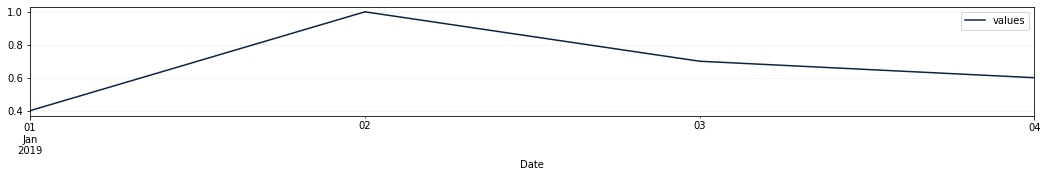

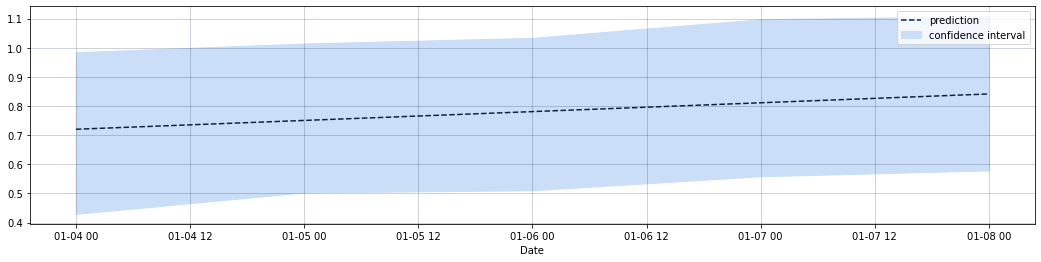

In [5]:
# Predict 4 days after the data's last time stamp
Y_hat = m.predict('4 days')
m.X_train.plot()
Y_hat.plot()

## Multivariate Prediction

In [6]:
ts1 = ta.TimeSeries.create("01-01-2020", "01-03-2020", "H").fill(0)
ts2 = ta.TimeSeries.create("01-01-2020", "01-03-2020", "H").fill(0)
ts3 = ta.TimeSeries.create("01-01-2020", "01-03-2020", "H").fill(0)
ts4 = ta.TimeSeries.create("01-01-2020", "01-03-2020", "H").fill(0)
tsd = ta.TimeSeriesDataset([ts1, ts2, ts3, ts4])

In [7]:
## Model Creation
multivariate_model = ta.models.Prophet()

In [9]:
X_train, X_test = tsd.split_at("01-02-2020")

multivariate_model.fit(X_train, 0)

TypeError: argument of type 'int' is not iterable

In [5]:
type(tsd)

timeatlas.time_series_dataset.time_series_dataset.TimeSeriesDataset

In [23]:
def prepare_time_series_dataset_for_prophet(tsd, y: int):
        df = tsd.to_df().copy()
        df["ds"] = df.index
        df = df.reset_index(drop=True)
        df = df.rename(columns={y: "y"})
        return df
    
def prepare_time_series_for_prophet(ts):
    df = ts.to_df().copy()
    df["ds"] = df.index
    df = df.reset_index(drop=True)
    df = df.rename(columns={"values": "y"})
    return df

In [24]:
tsd[y] = tsd[y].empty()

,0,1,2,3
2020-01-01 00:00:00,NaN,0,0,0
2020-01-01 01:00:00,NaN,0,0,0
2020-01-01 02:00:00,NaN,0,0,0
2020-01-01 03:00:00,NaN,0,0,0
2020-01-01 04:00:00,NaN,0,0,0


In [6]:
df1 = prepare_time_series_for_prophet(ts1.empty())

In [7]:
y = 0
ts_y = tsd[y].empty()

In [17]:
tsd[y] = tsd[y].empty()
df = prepare_time_series_dataset_for_prophet(tsd, y)

In [19]:
df.head()

,y,1,2,3,ds
0,NaN,0,0,0,2020-01-01 00:00:00
1,NaN,0,0,0,2020-01-01 01:00:00
2,NaN,0,0,0,2020-01-01 02:00:00
3,NaN,0,0,0,2020-01-01 03:00:00
4,NaN,0,0,0,2020-01-01 04:00:00


In [10]:
len(tsd)

4

In [11]:
tsd[0] = ts_y

In [13]:
tsd[0]

                     values
2020-01-01 00:00:00     NaN
2020-01-01 01:00:00     NaN
2020-01-01 02:00:00     NaN
2020-01-01 03:00:00     NaN
2020-01-01 04:00:00     NaN
2020-01-01 05:00:00     NaN
2020-01-01 06:00:00     NaN
2020-01-01 07:00:00     NaN
2020-01-01 08:00:00     NaN
2020-01-01 09:00:00     NaN
2020-01-01 10:00:00     NaN
2020-01-01 11:00:00     NaN
2020-01-01 12:00:00     NaN
2020-01-01 13:00:00     NaN
2020-01-01 14:00:00     NaN
2020-01-01 15:00:00     NaN
2020-01-01 16:00:00     NaN
2020-01-01 17:00:00     NaN
2020-01-01 18:00:00     NaN
2020-01-01 19:00:00     NaN
2020-01-01 20:00:00     NaN
2020-01-01 21:00:00     NaN
2020-01-01 22:00:00     NaN
2020-01-01 23:00:00     NaN
2020-01-02 00:00:00     NaN
2020-01-02 01:00:00     NaN
2020-01-02 02:00:00     NaN
2020-01-02 03:00:00     NaN
2020-01-02 04:00:00     NaN
2020-01-02 05:00:00     NaN
2020-01-02 06:00:00     NaN
2020-01-02 07:00:00     NaN
2020-01-02 08:00:00     NaN
2020-01-02 09:00:00     NaN
2020-01-02 10:00:00 

In [12]:
df2 = prepare_time_series_dataset_for_prophet(tsd, 0).head()

In [13]:
df2.head()

,y,1,2,3,ds
0,0,0,0,0,2020-01-01 00:00:00
1,0,0,0,0,2020-01-01 01:00:00
2,0,0,0,0,2020-01-01 02:00:00
3,0,0,0,0,2020-01-01 03:00:00
4,0,0,0,0,2020-01-01 04:00:00


In [47]:
df = prepare_time_series_dataset_for_prophet(tsd, 0)

In [51]:
df

,y,1,2,3,ds
0,0,0,0,0,2020-01-01 00:00:00
1,0,0,0,0,2020-01-01 01:00:00
2,0,0,0,0,2020-01-01 02:00:00
3,0,0,0,0,2020-01-01 03:00:00
4,0,0,0,0,2020-01-01 04:00:00
5,0,0,0,0,2020-01-01 05:00:00
6,0,0,0,0,2020-01-01 06:00:00
7,0,0,0,0,2020-01-01 07:00:00
8,0,0,0,0,2020-01-01 08:00:00
9,0,0,0,0,2020-01-01 09:00:00
